In [0]:
pip install geopandas

     |████████████████████████████████| 931kB 3.4MB/s 
     |████████████████████████████████| 10.9MB 274kB/s 
     |████████████████████████████████| 14.7MB 211kB/s 


In [0]:
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
sns.set_style('whitegrid')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
fp = "/content/drive/My Drive/Igismap/Indian_States.shp" 
map_df = gpd.read_file(fp) ## reading shape file for states of india into dataframe

In [0]:
map_df.head()

,st_nm,geometry
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."


In [0]:
data_for_map=pd.read_excel('/content/drive/My Drive/Data_for_map.xlsx',dtype={'sates_name': str, 'positive': float,'negative': float,"neutral":float})  

In [0]:
 ## merging data from shape file and our twitter data using positive and negative tweets
merged = map_df.set_index('st_nm').join(data_for_map.set_index('states_name'))

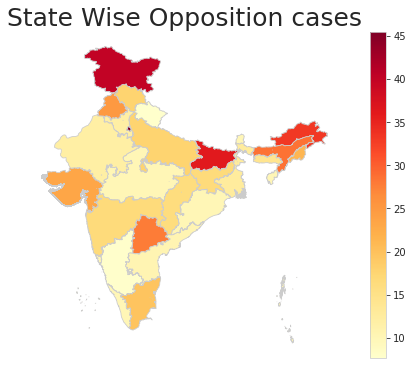

In [0]:
# plotting map for percentage of negative tweets
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.axis('off')
ax.set_title('State Wise Opposition cases', fontdict={'fontsize': '25', 'fontweight' : '3'})

# plot the figure
merged.plot(column='negative', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
fig.savefig("negative_state_wise.png", dpi=100)

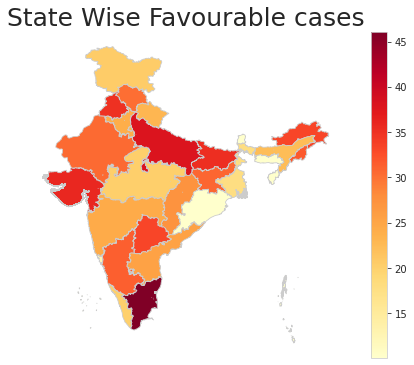

In [0]:
# plotting map for percentage of positive tweets
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.axis('off')
ax.set_title('State Wise Favourable cases', fontdict={'fontsize': '25', 'fontweight' : '3'})

# plot the figure
merged.plot(column='positive', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
fig.savefig("posititive_state_wise.png", dpi=100)